In [1]:
import pandas as pd
import numpy as np
import seaborn as sns

In [2]:
#load the data
df_complete = pd.read_csv("eval_test.csv")
display(df_complete.info())
display(df_complete)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 10 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Unnamed: 0                200 non-null    int64  
 1   repetition_number         200 non-null    int64  
 2   weight_index              200 non-null    int64  
 3   weight_tuple              200 non-null    object 
 4   num_iterations            200 non-null    int64  
 5   vehicle_id                200 non-null    int64  
 6   normalised_speed_reward   200 non-null    float64
 7   normalised_energy_reward  200 non-null    float64
 8   raw_speed_reward          200 non-null    float64
 9   raw_energy_reward         200 non-null    float64
dtypes: float64(4), int64(5), object(1)
memory usage: 15.8+ KB


None

,Unnamed: 0,repetition_number,weight_index,weight_tuple,num_iterations,vehicle_id,normalised_speed_reward,normalised_energy_reward,raw_speed_reward,raw_energy_reward
0,0,0,0,"[0.0, 1.0]",80,0,0.032264,0.983989,2.581154,78.719158
1,1,0,0,"[0.0, 1.0]",80,1,0.048187,0.999849,3.854944,79.987933
2,2,1,0,"[0.0, 1.0]",80,0,0.000685,0.952198,0.054787,76.175866
3,3,1,0,"[0.0, 1.0]",80,1,0.000345,0.952290,0.027600,76.183196
4,4,2,0,"[0.0, 1.0]",80,0,0.047935,0.999917,3.834838,79.993329
...,...,...,...,...,...,...,...,...,...,...
195,195,2,19,"[1.0, 0.0]",80,1,0.016358,0.968125,1.308650,77.450034
196,196,3,19,"[1.0, 0.0]",80,0,0.016183,0.968172,1.294668,77.453776
197,197,3,19,"[1.0, 0.0]",80,1,0.032042,0.984049,2.563384,78.723917
198,198,4,19,"[1.0, 0.0]",80,0,0.016088,0.968197,1.287059,77.455795


In [3]:
grouped_df = df_complete.groupby(["vehicle_id","weight_index"])["num_iterations"].mean()
grouped_df = grouped_df.reset_index()
print(grouped_df)
#sns.scatterplot(grouped_df, x="normalised_speed_reward",hue="vehicle_id")

    vehicle_id  weight_index  num_iterations
0            0             0            80.0
1            0             1            80.0
2            0             2            80.0
3            0             3            80.0
4            0             4            80.0
5            0             5            80.0
6            0             6            80.0
7            0             7            80.0
8            0             8            80.0
9            0             9            80.0
10           0            10            80.0
11           0            11            80.0
12           0            12            80.0
13           0            13            80.0
14           0            14            80.0
15           0            15            80.0
16           0            16            80.0
17           0            17            80.0
18           0            18            80.0
19           0            19            80.0
20           1             0            80.0
21        

<Axes: xlabel='weight_index', ylabel='num_iterations'>

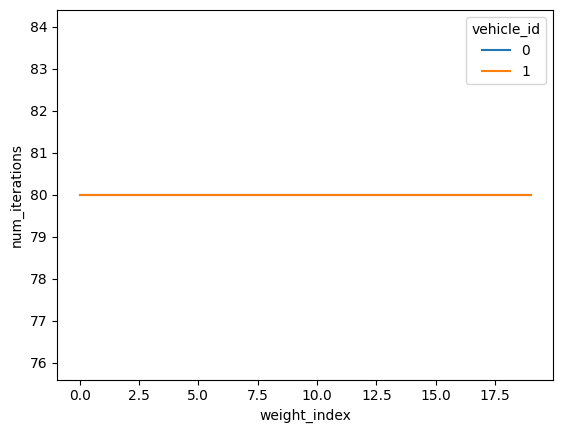

In [4]:
sns.lineplot(grouped_df, x="weight_index",y="num_iterations",hue="vehicle_id")

<Axes: xlabel='normalised_speed_reward', ylabel='normalised_energy_reward'>

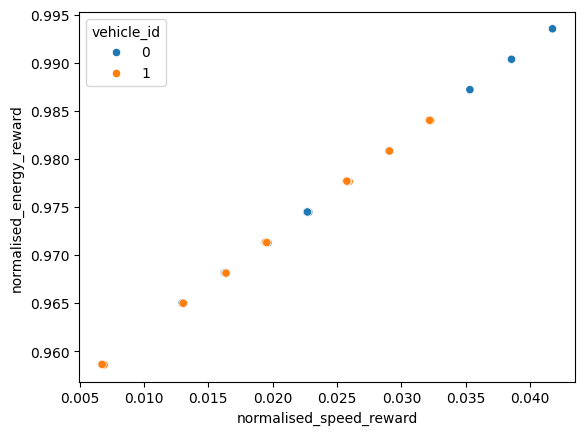

In [5]:
grouped_df = df_complete.groupby(["vehicle_id","weight_index"])[["normalised_speed_reward", "normalised_energy_reward"]].mean()
grouped_df = grouped_df.reset_index()
sns.scatterplot(grouped_df, x="normalised_speed_reward", y="normalised_energy_reward", hue="vehicle_id")

In [6]:
#load the data
df_complete = pd.read_csv("loss_test.csv")
display(df_complete.info())
display(df_complete)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 501440 entries, 0 to 501439
Data columns (total 3 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   Unnamed: 0  501440 non-null  int64  
 1   episode     501419 non-null  float64
 2   loss        501419 non-null  float64
dtypes: float64(2), int64(1)
memory usage: 11.5 MB


None

,Unnamed: 0,episode,loss
0,0,NaN,NaN
1,1,NaN,NaN
2,2,NaN,NaN
3,3,NaN,NaN
4,4,NaN,NaN
...,...,...,...
501435,501435,9999.0,0.000977
501436,501436,9999.0,0.000846
501437,501437,9999.0,0.001325
501438,501438,9999.0,0.000784


<Axes: xlabel='episode'>

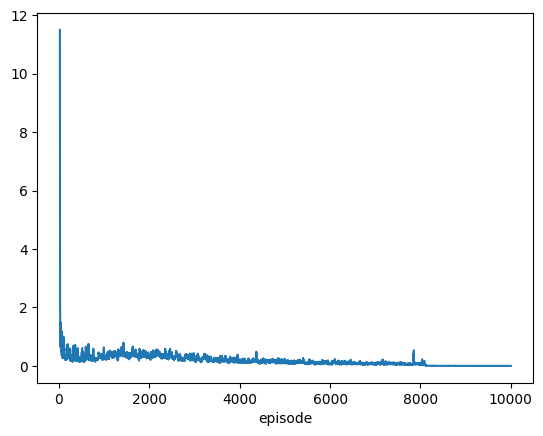

In [7]:
grouped_df = df_complete.groupby("episode")["loss"].mean()
grouped_df.to_frame().reset_index()
grouped_df.plot()

In [8]:
import sys, os
sys.path.append("../")
import gymnasium as gym
import mo_gymnasium as mo_gym
import numpy as np
from src import MOMA_DQN
from matplotlib import pyplot as plt
import matplotlib
import pandas as pd
import torch

env = mo_gym.make('moma-highway-env-v0', render_mode='rgb_array')
env.unwrapped.configure({
    "screen_width": 500,
    "screen_height": 500,
    "vehicles_count": 10,
    "controlled_vehicles": 2,
    "action": {
        "type": "MultiAgentAction",
        "action_config": {
            "type": "DiscreteMetaAction",
        }
    }
})

obs, info = env.reset()
obs = [torch.tensor(single_obs) for single_obs in obs] #reshape observations and
obs = [single_obs[~torch.isnan(single_obs)].reshape(1,-1) for single_obs in obs] #remove nan values
agent = MOMA_DQN.MOMA_DQN(env, num_objectives=2, seed=11, replay_buffer_size=1000, batch_ratio=0.3, use_multi_dqn=False, reward_structure="mean_reward", observation_space_name="Kinematics")
agent.load_network("model_test.pth")

In [10]:
agent.evaluate(num_repetitions= 2, num_points=5, render_episodes=True)

/home/franz/Documents/Master_Project/moma-rl-ad/venv/lib/python3.12/site-packages/gymnasium/core.py:311: UserWarning: WARN: env.viewer to get variables from other wrappers is deprecated and will be removed in v1.0, to get this variable you can do `env.unwrapped.viewer` for environment variables or `env.get_wrapper_attr('viewer')` that will search the reminding wrappers.
  logger.warn(










Weight tuple:  80%|████████  | 4/5 [00:33<00:08,  8.47s/it]


KeyboardInterrupt: 